
# Goal - To understand Feature Selection Technique (Feature Elimination) and compare the model quality.

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [80]:
#================Background=======================================

#Dataset is collected from 50 starts up company from United States with their spending pattern.
# Startup company has different  spending pattern wrt R&D Spend,Administration spend,Marketing Spend. 
#The data also contains  profit margins for each locations(States). 
#The primary objective of this exercise is to identify the best features that can influence  the profit of the company 
# By identifying the best features a better model can be prepared for future predictions like: 
#How much of profit a company can expect by spending X amount of money? somthong like this.

# I have used below 5 techniques for feature selection. 
#      1.Correlation Analysis Technique
#      2.Recursive Feature Elimination Technique
#      3.Analysis of Variance(ANOVA) Technique
#      4.Select by model Technique
#      5.Backward Elimination Tecnique
# The model score is evaluated for each technique and finally the technique which gives highest score is selected.  

In [35]:
startupData = pd.read_csv(r'C:\Saroj_Official\AI\DataSet\50_Startups.csv')

In [36]:
startupData.head()

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,NewYork,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,NewYork,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [44]:
finalDataset = pd.concat([pd.get_dummies(startupData.State), startupData.iloc[:,[0,1,2,4]]] ,axis = 1)
finalDataset.head()

,California,Florida,NewYork,RD_Spend,Administration,Marketing_Spend,Profit
0,0,0,1,165349.20,136897.80,471784.10,192261.83
1,1,0,0,162597.70,151377.59,443898.53,191792.06
2,0,1,0,153441.51,101145.55,407934.54,191050.39
3,0,0,1,144372.41,118671.85,383199.62,182901.99
4,0,1,0,142107.34,91391.77,366168.42,166187.94


# Method 1 -- Using Shortcut (Correlation Analysis)

In [6]:
#Get the corr
finalDataset.corr()

,California,Florida,New York,R&D Spend,Administration,Marketing Spend,Profit
California,1.000000,-0.492366,-0.515152,-0.143165,-0.015478,-0.168875,-0.145837
Florida,-0.492366,1.000000,-0.492366,0.105711,0.010493,0.205685,0.116244
New York,-0.515152,-0.492366,1.000000,0.039068,0.005145,-0.033670,0.031368
R&D Spend,-0.143165,0.105711,0.039068,1.000000,0.241955,0.724248,0.972900
Administration,-0.015478,0.010493,0.005145,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,-0.168875,0.205685,-0.033670,0.724248,-0.032154,1.000000,0.747766
Profit,-0.145837,0.116244,0.031368,0.972900,0.200717,0.747766,1.000000


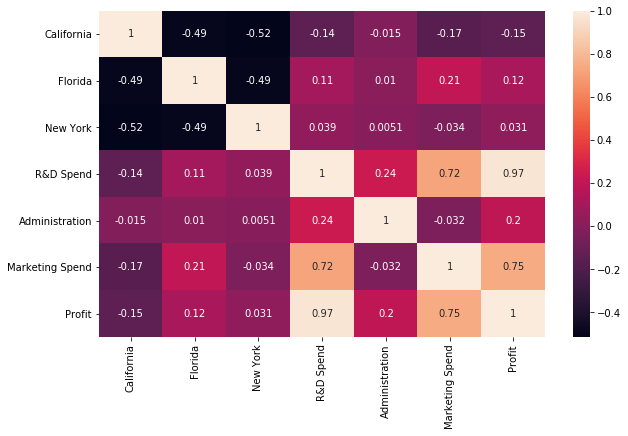

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(finalDataset.corr(),annot=True)

In [8]:
#Threshold is ideally decided by Data Scientist
# Select those features who are greater than 50% corr !!! (Regression)
# For Classification, avoid using this technique. If you are forced, threshold must be 80% or more
#Conclusion: Based on Corr Analysis, R&D spend and Marketing Spend will be the best features to create the model. 
#Thus eliminate the remaining

In [9]:
#Seperate your data as features and label
features = startupData.iloc[:,[0,2]].values
label = startupData.iloc[:,[4]].values

In [10]:
#Create Train Test Split
# The way how we sample the data directly impacts the model's performance. 
#This is statistically proven hence using this as an optimization mechanis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

for randomState in range(1,51):
    
    X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state=randomState)
    model = LinearRegression()
    model.fit(X_train,y_train)
    
    train_score = model.score(X_train,y_train)
    test_score = model.score(X_test,y_test)
    
    if test_score > train_score:
        print("Test Score: {} Training Score: {} Seed: {}".format(test_score,train_score,randomState))
    

Test Score: 0.9646437135748333 Training Score: 0.9423713608840596 Seed: 1
Test Score: 0.9814177491535381 Training Score: 0.9388772018080951 Seed: 2
Test Score: 0.9612876028942208 Training Score: 0.9459212470646745 Seed: 3
Test Score: 0.967485420088746 Training Score: 0.945533184485877 Seed: 4
Test Score: 0.9683604384024199 Training Score: 0.9436198878593198 Seed: 5
Test Score: 0.9909864896179557 Training Score: 0.9382176532996815 Seed: 10
Test Score: 0.9565036617363222 Training Score: 0.9472766838360558 Seed: 12
Test Score: 0.9499139926727364 Training Score: 0.9485793735881266 Seed: 13
Test Score: 0.9737137509772301 Training Score: 0.9410506991241665 Seed: 14
Test Score: 0.9475480505951939 Training Score: 0.9471972623797911 Seed: 17
Test Score: 0.9658516680116018 Training Score: 0.9457936305980141 Seed: 21
Test Score: 0.9764404302143169 Training Score: 0.9421707561468369 Seed: 22
Test Score: 0.9692234650571674 Training Score: 0.9461648988838399 Seed: 24
Test Score: 0.961357490939151 Tr

In [11]:
#Conclusion: Using R&D and Marketing spend gave a better model .THus this model can be a potential 
# candidate for deployment

# Method 2: Feature Selection using Recursive Feature Elimination (RFE)

In [12]:
# RFE can be applied only to the following algorithms
#
# 1. Algorithms that support coeff variables - Regression (LinearRegression, SVM, DecisionTreeRegression, RandomForestRegression)
# 2. Algorithms that support feature importance variable - Classification( DecisionTreeClassifier, RandomForestClassifier)

In [13]:
finalDataset.head()

,California,Florida,New York,R&D Spend,Administration,Marketing Spend,Profit
0,0,0,1,165349.20,136897.80,471784.10,192261.83
1,1,0,0,162597.70,151377.59,443898.53,191792.06
2,0,1,0,153441.51,101145.55,407934.54,191050.39
3,0,0,1,144372.41,118671.85,383199.62,182901.99
4,0,1,0,142107.34,91391.77,366168.42,166187.94


In [14]:
features=finalDataset.iloc[:,:-1].values
label=finalDataset.iloc[:,-1].values



In [15]:
featuresForRFE = finalDataset.iloc[:,:-1].values
labelForRFE = finalDataset.iloc[:,-1].values

In [16]:
#Steps to apply RFE:
# 1. Initialize the algo
# 2. Apply RFE on model
# 3. Get Features with High Rank

In [17]:
#1. Initialize the algo

from sklearn.linear_model import LinearRegression
modelForRFE = LinearRegression()

# 2. Apply RFE on model
from sklearn.feature_selection import RFE

#estimator contains the algorithm model object
# step defines how many features to be eliminated per iteration (Suggestion: Always select 1 feature per iteration (Backward Elimination algo))
# n_features_to_select defines how many features to select in first iteration. Default is 50% feature is selected if not specified.
selectFeaturesFromRFE = RFE(estimator= modelForRFE,n_features_to_select=3)

selectFeaturesFromRFE.fit(featuresForRFE,labelForRFE)

#3. Check Feature Ranks
print(finalDataset.columns)
print(selectFeaturesFromRFE.ranking_)
print(selectFeaturesFromRFE.support_)

Index(['California', 'Florida', 'New York', 'R&D Spend', 'Administration',
       'Marketing Spend', 'Profit'],
      dtype='object')
[1 1 1 2 3 4]
[ True  True  True False False False]


In [18]:
#Conclusion from RFE -- RFE says the profit can be determined based on the location of the company

In [19]:
#Seperate your data as features and label
features = finalDataset.iloc[:,[0,1,2]].values
label = finalDataset.iloc[:,[6]].values

In [20]:
#Create Train Test Split

# The way how we sample the data directly impacts the model's performance. This is statistically proven hence using this as an optimization mechanis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

for randomState in range(1,51):
    
    X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state=randomState)
    model = LinearRegression()
    model.fit(X_train,y_train)
    
    train_score = model.score(X_train,y_train)
    test_score = model.score(X_test,y_test)
    
    if test_score > train_score:
        print("Test Score: {} Training Score: {} Seed: {}".format(test_score,train_score,randomState))
    

Test Score: 0.1507109998333278 Training Score: -0.06593244561790113 Seed: 6
Test Score: 0.015080875800281057 Training Score: 0.0017731552271403883 Seed: 32
Test Score: 0.02532863096371374 Training Score: 0.013479770737339636 Seed: 49


In [21]:
#Conclusion(Data Scientist): The Observations derived from RFE doesnt satisfy the accuracy requirement. Thus rejected

# Method 3 - Univariate Analysis using ANOVA

In [22]:
finalDataset.head()

,California,Florida,New York,R&D Spend,Administration,Marketing Spend,Profit
0,0,0,1,165349.20,136897.80,471784.10,192261.83
1,1,0,0,162597.70,151377.59,443898.53,191792.06
2,0,1,0,153441.51,101145.55,407934.54,191050.39
3,0,0,1,144372.41,118671.85,383199.62,182901.99
4,0,1,0,142107.34,91391.77,366168.42,166187.94


In [23]:
featuresForANOVA = finalDataset.iloc[:,:-1].values
labelForANOVA = finalDataset.iloc[:,-1].values

In [24]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_regression

selectFeaturesFromANOVA=SelectPercentile(percentile=50,score_func=f_regression) #Percentile here denotes % features to keep

selectFeaturesFromANOVA.fit(featuresForANOVA,labelForANOVA)

print(selectFeaturesFromANOVA.get_support())
print(selectFeaturesFromANOVA.pvalues_)

[False False False  True  True  True]
[3.12228656e-01 4.21447913e-01 8.28796347e-01 3.50032224e-32
 1.62217395e-01 4.38107318e-10]


In [25]:
from sklearn.feature_selection import  SelectPercentile
from sklearn.feature_selection import f_regression #This is for regression algo
#from sklearn.feature_selection import f_classif  #This is for classification algo

selectFeaturesFromANOVA = SelectPercentile(percentile=50, score_func=f_regression)#Percentile here denotes % features to keep

selectFeaturesFromANOVA.fit(featuresForANOVA,labelForANOVA)

print(finalDataset.columns)
print(selectFeaturesFromANOVA.get_support())
print(selectFeaturesFromANOVA.pvalues_)

Index(['California', 'Florida', 'New York', 'R&D Spend', 'Administration',
       'Marketing Spend', 'Profit'],
      dtype='object')
[False False False  True  True  True]
[3.12228656e-01 4.21447913e-01 8.28796347e-01 3.50032224e-32
 1.62217395e-01 4.38107318e-10]


In [26]:
#Conclusion from ANOVA -- Profit of the company completely depends on the spending pattern of your funds(R&D, Adm, Mark)

In [27]:
#Seperate your data as features and label
features = finalDataset.iloc[:,[3,4,5]].values
label = finalDataset.iloc[:,[6]].values

In [28]:
#Create Train Test Split

# The way how we sample the data directly impacts the model's performance. 
#This is statistically proven hence using this as an optimization mechanism
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

for randomState in range(1,len(finalDataset)):
    
    X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state=randomState)
    model = LinearRegression()
    model.fit(X_train,y_train)
    
    train_score = model.score(X_train,y_train)
    test_score = model.score(X_test,y_test)
    
    if test_score > train_score:
        print("Test Score: {} Training Score: {} Seed: {}".format(test_score,train_score,randomState))
    

Test Score: 0.9650940934427323 Training Score: 0.94240260741009 Seed: 1
Test Score: 0.9794909902425315 Training Score: 0.9397277457511108 Seed: 2
Test Score: 0.9604474684992019 Training Score: 0.946940634516175 Seed: 4
Test Score: 0.9689042545732487 Training Score: 0.9436742073775848 Seed: 5
Test Score: 0.9917459017235681 Training Score: 0.9383444814482027 Seed: 10
Test Score: 0.9497398332848894 Training Score: 0.9485205028772792 Seed: 12
Test Score: 0.9729719984514297 Training Score: 0.94107252159072 Seed: 14
Test Score: 0.9658747497132993 Training Score: 0.9457936541281106 Seed: 21
Test Score: 0.9766179840086033 Training Score: 0.942474686754789 Seed: 22
Test Score: 0.969985361118421 Training Score: 0.9463969619029228 Seed: 24
Test Score: 0.9615581146744923 Training Score: 0.9452671454762598 Seed: 26
Test Score: 0.9511342679296733 Training Score: 0.9481498306863594 Seed: 29
Test Score: 0.9570638759424795 Training Score: 0.9431922326920479 Seed: 31
Test Score: 0.9655432049381097 Train

In [29]:
#Conclusion: Currently the optimized model for this usecase with random state 10

# Method 4 : Select Features by Algo (SelectByModel) 

In [30]:
finalDataset.head()

,California,Florida,New York,R&D Spend,Administration,Marketing Spend,Profit
0,0,0,1,165349.20,136897.80,471784.10,192261.83
1,1,0,0,162597.70,151377.59,443898.53,191792.06
2,0,1,0,153441.51,101145.55,407934.54,191050.39
3,0,0,1,144372.41,118671.85,383199.62,182901.99
4,0,1,0,142107.34,91391.77,366168.42,166187.94


In [31]:
featuresForModel = finalDataset.iloc[:,:-1].values
labelForModel = finalDataset.iloc[:,-1].values

In [32]:
# 1. Initialize the algo

from sklearn.linear_model import LinearRegression
modelForModel = LinearRegression()

# 2. Apply Select By Model

from sklearn.feature_selection import SelectFromModel
selectFeaturesFromModel = SelectFromModel(estimator=modelForModel)

selectFeaturesFromModel.fit(featuresForModel,labelForModel)


#Get the support
print(finalDataset.columns)
print(selectFeaturesFromModel.get_support())

Index(['California', 'Florida', 'New York', 'R&D Spend', 'Administration',
       'Marketing Spend', 'Profit'],
      dtype='object')
[ True  True  True False False False]


In [33]:
#Conclusion by SelectByModel - says the profit can be determined based on the location of the company

In [34]:
# We already received the same reading in RFE . So REJECTED !!!

# Method 5 -- BackwardEllimination Technique(By OLS)

In [ ]:
#Step 1: Perform All In
#Step 2: Decide SL - 0.05
#Step 3: Perform OLS (Calc P-value)
#Step 4: Select the feature with highest p-value which is greater than 0.05 and remove this feature 
#Step 5: recreate the new features and perform OLS once again and perform step4
# Repeat this step until we get all features with p-value < 0.05

In [45]:
from statsmodels.formula.api import ols

# create model object

feature = ' + '.join(finalDataset.drop(columns='Profit', axis = 1).columns)
model = ols('Profit ~ ' + feature , data = finalDataset)
# fit the model
LR=model.fit()
LR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Wed, 19 Aug 2020   Prob (F-statistic):           1.34e-27
Time:                        10:03:00   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        3.763e+04   5073.636      7.417      0.000    2.74e+04    4.79e+04
California       1.249e+04   2449.797      5.099      0.000    7554.868    1.74e+04
Florida          1.269e+04   2726.700      4.654      0.000    7195.596    1.82e+04
NewYork          1.245e+04   2486.364      5.007      0.000    7439.285    1.75e+04
RD_Spend            0.8060      0.046     17.369      0.000       0.712       0.900
Administration     -0.0270      0.052     -0.517      0.608      -0.132       0.078
Marketing_Spend     0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     4.29e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.11e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
#Step 4: Select the feature with highest p-value  and we selected Administration
#Step 5: if p value > SL {} else {}
# Recreate featurearray eliminating Admin Spend

In [48]:
# create model object

Newfeature = ' + '.join(finalDataset.drop(columns=['Profit','Administration'], axis = 1).columns)

model2 = ols('Profit ~ ' + Newfeature , data = finalDataset)
# fit the model
LR2 = model2.fit()
LR2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     215.8
Date:                Wed, 19 Aug 2020   Prob (F-statistic):           9.72e-29
Time:                        10:04:41   Log-Likelihood:                -525.53
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1071.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        3.525e+04   2100.376     16.782      0.000     3.1e+04    3.95e+04
California       1.171e+04   1910.312      6.130      0.000    7861.854    1.56e+04
Florida          1.185e+04   2170.903      5.459      0.000    7477.785    1.62e+04
NewYork          1.169e+04   1988.428      5.879      0.000    7684.996    1.57e+04
RD_Spend            0.7967      0.042     18.771      0.000       0.711       0.882
Marketing_Spend     0.0298      0.016      1.842      0.072      -0.003       0.062
==============================================================================
Omnibus:                       14.640   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.037
Skew:                          -0.938   Prob(JB):                     2.70e-05
Kurtosis:                       5.565   Cond. No.                     1.02e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.17e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [49]:
# create model object

Newfeature = ' + '.join(finalDataset.drop(columns=['Profit','Administration','Marketing_Spend'], axis = 1).columns)

model3 = ols('Profit ~ ' + Newfeature , data = finalDataset)
# fit the model
LR3 = model3.fit()
LR3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     272.4
Date:                Wed, 19 Aug 2020   Prob (F-statistic):           2.76e-29
Time:                        10:05:07   Log-Likelihood:                -527.35
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      46   BIC:                             1070.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.686e+04   1959.786     18.806      0.000    3.29e+04    4.08e+04
California  1.189e+04   1956.677      6.079      0.000    7955.697    1.58e+04
Florida     1.306e+04   2122.665      6.152      0.000    8785.448    1.73e+04
NewYork      1.19e+04   2036.022      5.847      0.000    7805.580     1.6e+04
RD_Spend       0.8530      0.030     28.226      0.000       0.792       0.914
==============================================================================
Omnibus:                       13.418   Durbin-Watson:                   1.122
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.605
Skew:                          -0.907   Prob(JB):                     0.000150
Kurtosis:                       5.271   Cond. No.                     3.70e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.74e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [51]:
finalDataset.head(1)

,California,Florida,NewYork,RD_Spend,Administration,Marketing_Spend,Profit
0,0,0,1,165349.2,136897.8,471784.1,192261.83


In [52]:
# Now the final features are  California,Florida,NewYork,RD_Spend
features = finalDataset.drop(columns=['Profit','Administration','Marketing_Spend'])
label = finalDataset.iloc[:,-1].values

In [55]:
#Create Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state= 1)

#Create LinearRegression Model using newFeatures2 as features and label as label
from sklearn.linear_model import LinearRegression
finalModel = LinearRegression()
finalModel.fit(X_train,y_train)

print(finalModel.score(X_train,y_train))
print(finalModel.score(X_test,y_test))

0.9387161169637389
0.961110252988297


In [31]:
#Report Time :)

In [57]:
columns = ['Correlation Analysis','RFE', 'ANOVA', 'SelectFroMModel','BFE (OLS)']
AccuracyValues= [[0.9909864896179557,0.039661078925242066,0.991745901723568,0.039661078925242066,0.961110252988297]]

df = pd.DataFrame(AccuracyValues,columns=columns)
df


,Correlation Analysis,RFE,ANOVA,SelectFroMModel,BFE (OLS)
0,0.990986,0.039661,0.991746,0.039661,0.96111


# Summary and  Conclusion !!
#1.Among all the feature selection technique used here, ANOVA technique seems to give highest accuracy score. 
#2.It is also worth mentioning for the fact that there is no single technique which will fit best for all scenarios.
#3.Hence we need to utilize maximum possible feature selection technique as possible and see which one performs better.
#4.As a general rule, Correlation and Backward elimination using OLS works best for Regression problem and other technique such as 
#5.RFE(Recursive Feature Elimination), AnalyisofVariance(ANOVA),Select From Model can be utlized both for Regression and Classification.
#6.Chisquare Test of Indepndence can be utilized for Categorical features and label